#### Libraries

In [40]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import glob
import xmltodict
from tensorflow.keras.utils import to_categorical
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from urllib.request import urlopen
from xml.etree.ElementTree import parse
from numpy import expand_dims
from keras.utils.image_utils import load_img
from keras.utils.image_utils import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator # load the image
import xml.etree.ElementTree as ET
import cv2
import numpy as np
from matplotlib.colors import LogNorm
from skimage import io
from scipy.signal import convolve2d
from PIL import Image  
import PIL 
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import urllib
import xml.etree.ElementTree as ET # copy of xml


In [7]:
from bs4 import BeautifulSoup
from PIL import Image
import requests
from matplotlib import pyplot as plt
from io import BytesIO

In [15]:
 def visualize(**images):
     """PLot images in one row."""
     n = len(images)
     plt.figure(figsize=(16, 5))
     for i, (name, image) in enumerate(images.items()):
         plt.subplot(1, n, i + 1)
         plt.xticks([])
         plt.yticks([])
         plt.title(' '.join(name.split('_')).title())
         plt.imshow(image)
     plt.show()

#### Reading URLs for images and annotations

In [8]:
prefix_url_imgs = "https://raw.githubusercontent.com/konstantinos-al/ml_project_quebec/main/Kaggle_helmets/images/"
number_of_imgs = 766 # +1 to include last one (765)

list_imgs = []

for i in range(0, number_of_imgs):
    i = str(i)
    var_imgs = "BikesHelmets" + i + ".png"
    var_imgs_url = prefix_url_imgs + var_imgs
    list_imgs.append(var_imgs_url)

#for i in range(0, len(list_imgs)):
#    response = requests.get(list_imgs[i])
#    img = Image.open(BytesIO(response.content))
#    plt.imshow(img)

In [9]:
prefix_url_xml = "https://raw.githubusercontent.com/konstantinos-al/ml_project_quebec/main/Kaggle_helmets/annotations/"
number_of_annt = 766 # +1 to include last one (765)

list_annotations= []

for i in range(0, number_of_annt):
    i = str(i)
    var_annt = "BikesHelmets" + i + ".xml"
    var_annt_url = prefix_url_xml + var_annt
    list_annotations.append(var_annt_url)

#for i in range(0, len(list_annotations)):
#    response = requests.get(list_imgs[i])
#    img = Image.open(BytesIO(response.content))
#    plt.imshow(img)

#### Labelling images from annotations XMLs

In [22]:
# same code with below by removing cropping

#### Augmentation of full images

#### Cropping images with bounding box

In [92]:
cropped_imgs = []

for xml_path in list_annotations:
    try:    
        with urlopen(xml_path) as my_xml:
        
            xmld = xmltodict.parse(my_xml)
            tags = xmld['annotation']

            img_path = prefix_url_imgs + tags['filename']
            img_url = requests.get(img_path)
            img_temp = Image.open(BytesIO(img_url.content))
            image = cv2.cvtColor(np.array(img_temp), cv2.COLOR_BGR2RGB)
            mask = np.zeros(image.shape, dtype = 'int32')

            if 'object' in tags:

                if isinstance(tags['object'], list):
                    for i in tags['object']:
                        xmin = int(i['bndbox']['xmin'])
                        ymin = int(i['bndbox']['ymin'])
                        xmax = int(i['bndbox']['xmax'])
                        ymax = int(i['bndbox']['ymax'])
                        if i['name'] == 'With Helmet':
                            mask = cv2.rectangle(mask, (xmin,ymin), (xmax,ymax), (0,255,0), -1)
                            result = cv2.addWeighted(image, 1, mask, 0.9, 0.7, dtype = cv2.CV_8UC3)
                            cropped_imgs.append([tags['filename'], image[ymin:ymax, xmin:xmax], 0, img_path])
                            #visualize(image=image, result = result, head = image[ymin:ymax, xmin:xmax])
                            
                        else:
                            cv2.rectangle(mask, (xmin,ymin), (xmax,ymax), (255,0,0), -1)
                            result = cv2.addWeighted(image, 1, mask, 0.9, 0.7, dtype = cv2.CV_8UC3)
                            cropped_imgs.append([tags['filename'], image[ymin:ymax, xmin:xmax], 1, img_path])
                            
                            #plt.imsave(os.path.join('results', tags['filename']), result)
                    #visualize(image=image, result = result, head = image[ymin:ymax, xmin:xmax])
                if isinstance(tags['object'], dict):
                    xmin = int(tags['object']['bndbox']['xmin'])
                    ymin = int(tags['object']['bndbox']['ymin'])
                    xmax = int(tags['object']['bndbox']['xmax'])
                    ymax = int(tags['object']['bndbox']['ymax'])
                    if tags['object']['name'] == 'With Helmet':
                        cv2.rectangle(mask, (xmin,ymin), (xmax,ymax), (0,255,0), -1)
                        result = cv2.addWeighted(image, 1, mask, 0.9, 0.7, dtype = cv2.CV_8UC3)
                        cropped_imgs.append([tags['filename'], image[ymin:ymax, xmin:xmax], 0, img_path])
                        #visualize(image=image, result = result, head = image[ymin:ymax, xmin:xmax])
                    else:
                        cv2.rectangle(mask, (xmin,ymin), (xmax,ymax), (255,0,0), -1)
                        result = cv2.addWeighted(image, 1, mask, 0.9, 0.7, dtype = cv2.CV_8UC3)
                        cropped_imgs.append([tags['filename'], image[ymin:ymax, xmin:xmax], 1, img_path])
                    # plt.imsave(os.path.join('results', tags['filename']), result)
                    #visualize(image=image, result = result, head = image[ymin:ymax, xmin:xmax])
            else:
                pass
    except:
        pass

In [65]:
# Υπάρχουν κάποιες φωτογρασφίες με λάθος τα annotations και για να μην σκάει προς το παρόν

def checking_for_zero_shapes(list):
    for i, label_image in enumerate(list):
        image = np.array(label_image[1]).astype(np.int32)
        if image.shape[0]==0 or image.shape[1]==0:
            list.pop(i)

    return list

In [71]:
# Κάνουμε visualize μία φωτό + reshape, flatten και 0-1

cropped_imgs_cleaned = checking_for_zero_shapes(cropped_imgs)
#imgs_labels.pop(1342) #H prohgoumenh sunarthsh de mporei na bgalei authn thn eikona, de kserw giati
#cropped_array = np.array(cropped_imgs_cleaned, dtype='object').reshape(-1,2,1)
    #imgs_labels = np.array(imgs_labels).reshape(-1,2,1)
#cropped_array_reshaped = cropped_array[:,0].reshape(-1,1).astype(np.int32)
cropped_flatten = cropped_array_reshaped[:,1].flatten()
cropped_normalized = cropped_flatten/255
imgs = np.array(cropped_normalized)
#print(imgs)

visualize(Sample_Image = imgs[0])

ValueError: invalid literal for int() with base 10: 'BikesHelmets0.png'

#### Augmentantion functions

In [173]:
def convert(img):
    # convert to numpy array
    #data = img_to_array(img)
    # expand dimension to one sample
    samples = expand_dims(img, 0)
    return samples

In [191]:
expand_dims(cropped_imgs[0][1],0)

array([[[[222, 231, 236, 255],
         [216, 226, 233, 255],
         [209, 221, 228, 255],
         ...,
         [169, 164, 156, 255],
         [170, 165, 157, 255],
         [170, 166, 158, 255]],

        [[226, 233, 238, 255],
         [222, 231, 236, 255],
         [219, 228, 234, 255],
         ...,
         [170, 164, 156, 255],
         [171, 165, 157, 255],
         [171, 167, 159, 255]],

        [[226, 234, 239, 255],
         [223, 232, 237, 255],
         [222, 231, 236, 255],
         ...,
         [169, 162, 154, 255],
         [170, 163, 155, 255],
         [170, 167, 160, 255]],

        ...,

        [[211, 160, 168, 255],
         [220, 175, 181, 255],
         [223, 174, 180, 255],
         ...,
         [174, 179, 168, 255],
         [139, 158, 146, 255],
         [118, 147, 138, 255]],

        [[214, 163, 171, 255],
         [221, 175, 180, 255],
         [224, 174, 180, 255],
         ...,
         [206, 190, 183, 255],
         [152, 156, 145, 255],
         

In [180]:
convert(cropped_imgs[0][1])

array([[[[222, 231, 236, 255],
         [216, 226, 233, 255],
         [209, 221, 228, 255],
         ...,
         [169, 164, 156, 255],
         [170, 165, 157, 255],
         [170, 166, 158, 255]],

        [[226, 233, 238, 255],
         [222, 231, 236, 255],
         [219, 228, 234, 255],
         ...,
         [170, 164, 156, 255],
         [171, 165, 157, 255],
         [171, 167, 159, 255]],

        [[226, 234, 239, 255],
         [223, 232, 237, 255],
         [222, 231, 236, 255],
         ...,
         [169, 162, 154, 255],
         [170, 163, 155, 255],
         [170, 167, 160, 255]],

        ...,

        [[211, 160, 168, 255],
         [220, 175, 181, 255],
         [223, 174, 180, 255],
         ...,
         [174, 179, 168, 255],
         [139, 158, 146, 255],
         [118, 147, 138, 255]],

        [[214, 163, 171, 255],
         [221, 175, 180, 255],
         [224, 174, 180, 255],
         ...,
         [206, 190, 183, 255],
         [152, 156, 145, 255],
         

In [187]:
def picture_zoom(image):
   
   # create image data augmentation generator
    datagen_zoom= ImageDataGenerator(zoom_range=[0.8,1.5])

    # prepare iterator
    it_zoom = datagen_zoom.flow(image, batch_size=1)

    # generate batch of images
    batch_zoom = it_zoom.next()
    
    # convert to unsigned integers for viewing
    image_zoom = batch_zoom[0].astype('uint64')
    
    # plot raw pixel 
    img_zoom=plt.imshow(image_zoom, interpolation ='None', filternorm=True) #spline36, antialiased

    # appending to list
    list = [image, image_zoom]
    return list
    #save new picture
    #img_zoom.figure.savefig("C://Users//Eftixia//Desktop//dataset//Final Helmet datasets//Helmet Kaggle//Augmentation//Zoom"+imagename+".png")

In [167]:
#plt.imshow(cropped_imgs[0][1], interpolation='nearest')
#plt.show()
cropped_imgs[0][1].shape#.reshape(-1,1,4)

(55, 53, 4)

[array([[[[ 92, 129, 148, 255],
          [ 78, 111, 131, 255],
          [ 98, 113, 133, 255],
          ...,
          [100, 133, 156, 255],
          [113, 138, 158, 255],
          [127, 153, 172, 255]],
 
         [[106, 139, 159, 255],
          [ 86, 118, 138, 255],
          [ 87, 101, 121, 255],
          ...,
          [100, 132, 155, 255],
          [111, 137, 157, 255],
          [133, 160, 179, 255]],
 
         [[105, 134, 154, 255],
          [130, 159, 178, 255],
          [105, 115, 134, 255],
          ...,
          [110, 142, 165, 255],
          [113, 141, 160, 255],
          [124, 152, 171, 255]],
 
         ...,
 
         [[ 20,  20,  26, 255],
          [  8,   8,  15, 255],
          [ 12,  12,  19, 255],
          ...,
          [148, 160, 171, 255],
          [147, 159, 171, 255],
          [148, 160, 172, 255]],
 
         [[ 28,  28,  34, 255],
          [ 11,  11,  18, 255],
          [  8,   8,  16, 255],
          ...,
          [148, 159, 171, 255],
 

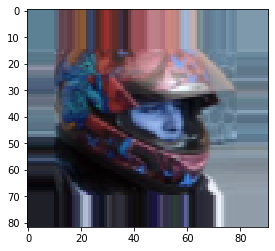

In [195]:
picture_zoom(convert(cropped_imgs[4][1]))

In [136]:
#### Augmentantion of cropped images
test_list = []
for i in range(0, len(cropped_imgs)+1):
    picture_zoom(cropped_imgs[i])

ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (55, 53, 4))

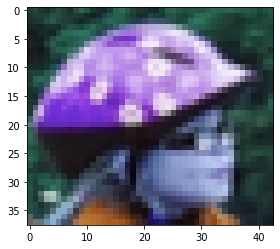

In [124]:
plt.imshow(cropped_imgs[1342][1], interpolation='nearest')
plt.show()